![](https://i.imgur.com/JsMvGnP.png)


## Exercício de análise exploratória de dados

Neste projeto você irá realizar uma análise estatística de um dos dataset mais famosos da comunidade de Data Science, o dataset **Titanic**.

Esse dataset contém dados de 891 passageiros do Titanic. A análise vai ser guiada pelas perguntas apresentadas a seguir.

O dataset disponibilizado tem quase a mesma estrutura de uma planilha do excel, com linhas e colunas. O tipo do arquivo é o CSV ou Comma-separated values, que seriam Valores Separados por Vírgula, porque é exatamente assim que ele funciona, você distingue que o valor pertence a diferentes colunas porque a vírgula está ali separando uns dos outros.

O objetivo deste projeto é você aplicar os principais conceitos que você aprendeu na unidade 6.
Todo o projeto deve ser executado neste Jupyter Notebook. Por fim, se desejar, revise as respostas com o seu mentor.

### Descrição dos dados

O dataset possui 891 registros (linhas) e 12 atributos (colunas).

Abaixo estão as descrições das colunas do nosso Dataset:

* passengerid = ID do passageiro do navio (código primário).
* survived = Se sobreviveu ao naufrágio estará como 1 e caso esteja com 0 (zero) não sobreviveu.
* pclass = Tipo de classe de passagem (Do 1 ao 3), sendo 1 a melhor classe e 3 a pior classe.
* name = Nome do passageiro
* sex = Gênero do passageiro, sendo masculino e feminino.
* age = Idade do passageiro na data da ocorrência do naufrágio.
* sibsp = Número de irmãos / cônjuges a bordo.
* parch = Número de pais / filhos a bordo.
* ticket = Código do ticket.
* fare = Valor da passagem.
* cabin = Código de identificação da Cabine.
* embarked = Local ondem o passageiro embarcou no navio.

### Carregando os dados

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
import pandas as pd

# Carregando os dados
# O arquivo “titanic.csv” deve estar salvo na mesma pasta do seu código Python
dados = pd.read_csv("/content/drive/My Drive/Awari/Exercicios/eda_exercises/titanic.csv")

# Exibe o número de linhas e colunas
print(dados.shape)

# Exibe as 10 primeiras linhas
dados.head()

(891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### 1. Qual foi a porcentagem dos passageiros sobreviventes?

Dica: use a função value_counts() do pandas com o parâmetro _normalize_

In [ ]:
# Seu código

In [7]:
dados['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

### 2. Qual era a faixa etária dos passageiros que estavam no Titanic?

In [ ]:
# Seu código

In [8]:
print(dados['Age'].min(), dados['Age'].max())

0.42 80.0


### 3. Qual porcentagem de homens e mulheres sobreviventes?

In [9]:
# Seu código
total_sobreviventes = dados.loc[dados['Survived'] == 1, 'Sex'].value_counts()
total_de_passageiros = dados['Sex'].value_counts()

percentage_female = total_sobreviventes['female'] / total_de_passageiros['female']
percentage_male = total_sobreviventes['male'] / total_de_passageiros['male']

In [10]:
print(f"Mulheres: {percentage_female}\nHomens: {percentage_male}")

Mulheres: 0.7420382165605095
Homens: 0.18890814558058924


### 4. Quais os tipos de variáveis nas colunas survived, pclass, name, sex e age?

[Dica ...](# Referência: http://professorguru.com.br/estatistica/introdu%C3%A7%C3%A3o%20%C3%A0%20estat%C3%ADstica/tipos%20de%20vari%C3%A1veis%20estat%C3%ADsticas.html)

In [15]:
dados.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S


**Variáveis Estatísticas**

Qualitativa Nominal: Sex, Survived

Qualitativa Ordinal: Pclass

Quantitativa Contínua: Age

### 5. Qual o tipo de classe de passagem mais frequente nos dados?

In [ ]:
# Seu código

In [ ]:
dados['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

### 6. Qual a média e desvio padrão do valor das passagens?

In [ ]:
# Seu código
media = dados['Fare'].mean()
stdv = dados['Fare'].std()

print(f"Media: {media}\nDesvio Padrao: {stdv}")

Media: 32.2042079685746
Desvio Padrao: 49.693428597180905


Méida: 32.2042079685746
Desvio Padrão: 49.693428597180905


### 7. Existem outliers na coluna age? Quais? Crie um boxplot para esse atributo.

In [ ]:
!pip install seaborn

/home/andrefonseca/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


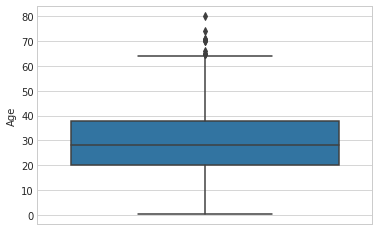

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("whitegrid")

ax = sns.boxplot(x=dados["Age"], orient='v')
plt.show()

In [ ]:
from scipy.stats import iqr

IQR = iqr(dados["Age"].dropna())
Q3 = float(dados["Age"].quantile([.75]))
upper_outliers = Q3 + 1.5 * IQR

In [ ]:
upper_outliers

64.8125

In [ ]:
dados_outliers = dados[dados['Age'] >= upper_outliers]
dados_outliers

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
33,34,0,2,"Wheadon, Mr. Edward H",male,66.0,0,0,C.A. 24579,10.5000,NaN,S
54,55,0,1,"Ostby, Mr. Engelhart Cornelius",male,65.0,0,1,113509,61.9792,B30,C
96,97,0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,A5,C
116,117,0,3,"Connors, Mr. Patrick",male,70.5,0,0,370369,7.7500,NaN,Q
280,281,0,3,"Duane, Mr. Frank",male,65.0,0,0,336439,7.7500,NaN,Q
456,457,0,1,"Millet, Mr. Francis Davis",male,65.0,0,0,13509,26.5500,E38,S
493,494,0,1,"Artagaveytia, Mr. Ramon",male,71.0,0,0,PC 17609,49.5042,NaN,C
630,631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.0000,A23,S
672,673,0,2,"Mitchell, Mr. Henry Michael",male,70.0,0,0,C.A. 24580,10.5000,NaN,S
745,746,0,1,"Crosby, Capt. Edward Gifford",male,70.0,1,1,WE/P 5735,71.0000,B22,S


### 8. Cria um histograma para os atributos age, pclass e fare. Quais informações você pode extrair desses gráficos?


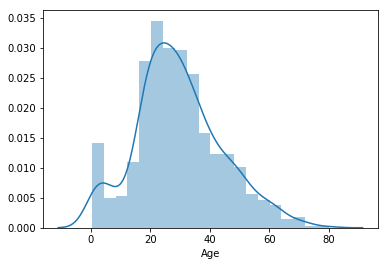

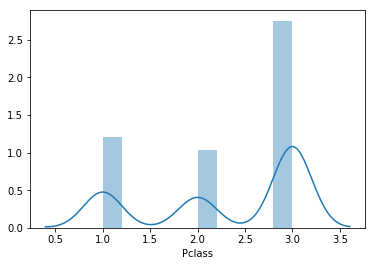

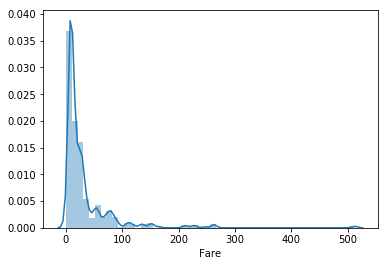

In [ ]:
# Seu código
import seaborn as sns
import matplotlib.pyplot as plt

sns.distplot(dados['Age'].dropna())
plt.show()

sns.distplot(dados['Pclass'].dropna())
plt.show()

sns.distplot(dados['Fare'].dropna())
plt.show()
